# List
Load data → cek jumlah baris, kolom, missing values.  
Distribusi label → lihat apakah dataset seimbang atau tidak.  
Panjang teks → distribusi jumlah kata / karakter per berita.  
Analisis kata → kata paling sering muncul di berita fake vs real.

# 1. Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## 2. Load Data

In [ ]:
df = pd.read_csv('C:/Belajar Python/fake-news-detection/data/WELFake_Dataset.csv')
# Label (0 = fake and 1 = real
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


## 2. Cek info dataset

In [4]:
# 2. Info data
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None
Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


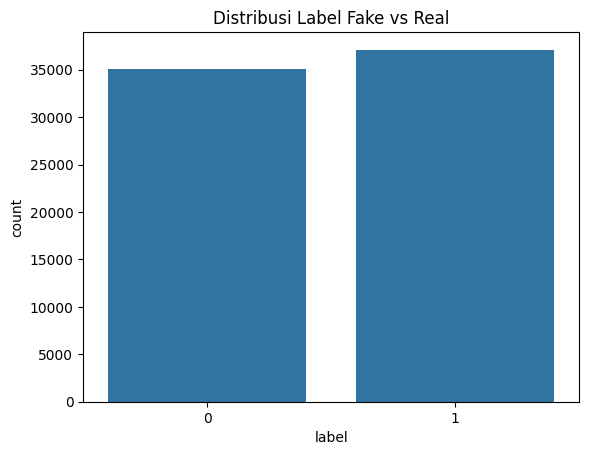

In [5]:
# 3. Distribusi label
sns.countplot(data=df, x='label')
plt.title('Distribusi Label Fake vs Real')
plt.show()

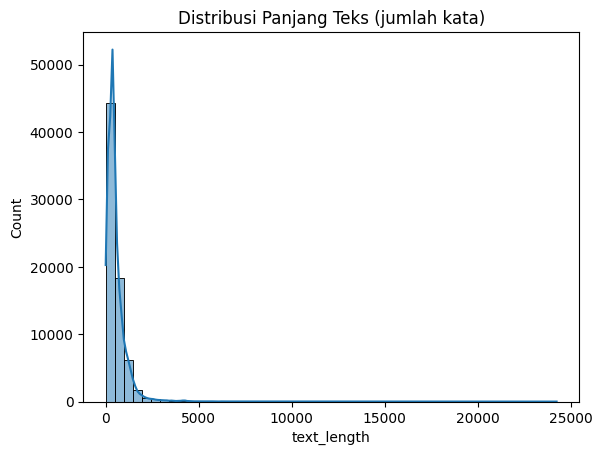

In [6]:
# 4. Panjang teks
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Teks (jumlah kata)')
plt.show()

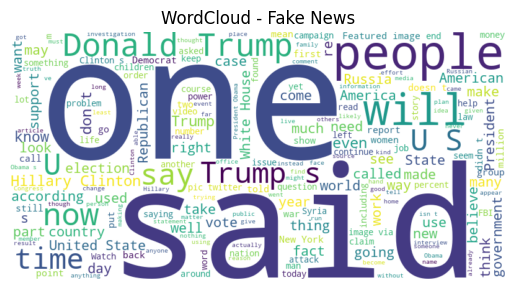

In [7]:
# 5. Wordcloud untuk Fake News
fake_text = " ".join(df[df['label']==1]['text'].astype(str))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Fake News')
plt.show()

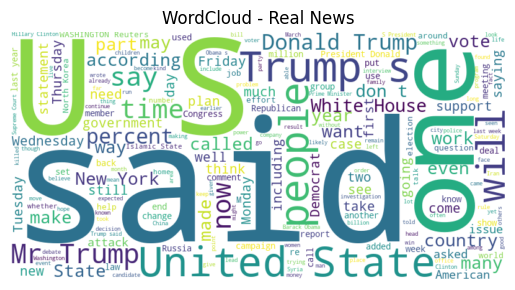

In [8]:
# 6. Wordcloud untuk Real News
real_text = " ".join(df[df['label']==0]['text'].astype(str))
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Real News')
plt.show()

## Untuk data yang 0 kita drop

In [9]:
df_clean = df.drop(columns=['Unnamed: 0'])

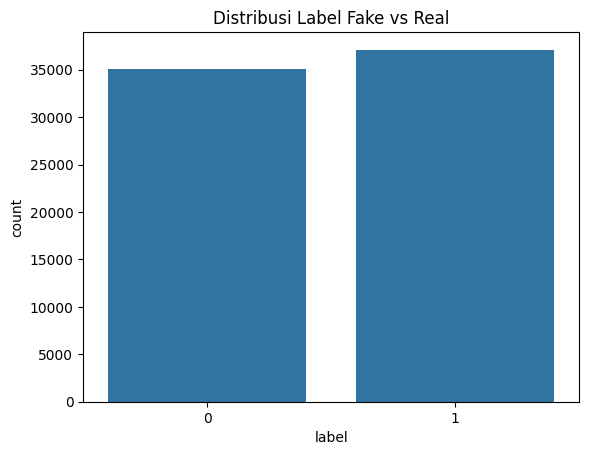

In [10]:
# 3. Distribusi label
sns.countplot(data=df_clean, x='label')
plt.title('Distribusi Label Fake vs Real')
plt.show()

Dataset relatif seimbang, karena jumlah berita palsu dan asli hampir sama.  
Ini baik untuk pelatihan model machine learning, karena model tidak akan bias ke salah satu kelas (tidak mendominasi Fake atau Real).  
Kita tidak perlu melakukan teknik penyeimbangan data (seperti oversampling atau undersampling), cukup langsung diproses ke tahap selanjutnya.

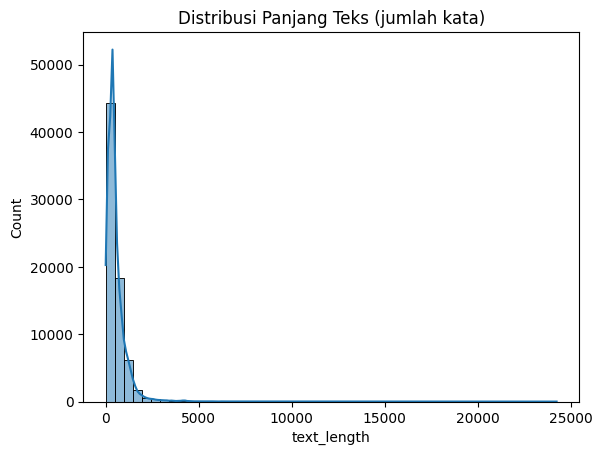

In [12]:
# 4. Panjang teks
df_clean['text_length'] = df_clean['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df_clean['text_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Teks (jumlah kata)')
plt.show()

In [13]:
df_clean['title'] = df_clean['title'].fillna('')
df_clean = df_clean.dropna(subset=['text'])